In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from skimage import data
from skimage.color import rgb2gray
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import data, exposure
import pandas as pd
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import RMSprop

In [3]:
# Caricamento del Dataset
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

C:\Users\domen\AppData\Local\Temp\ipykernel_9488\3010248450.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


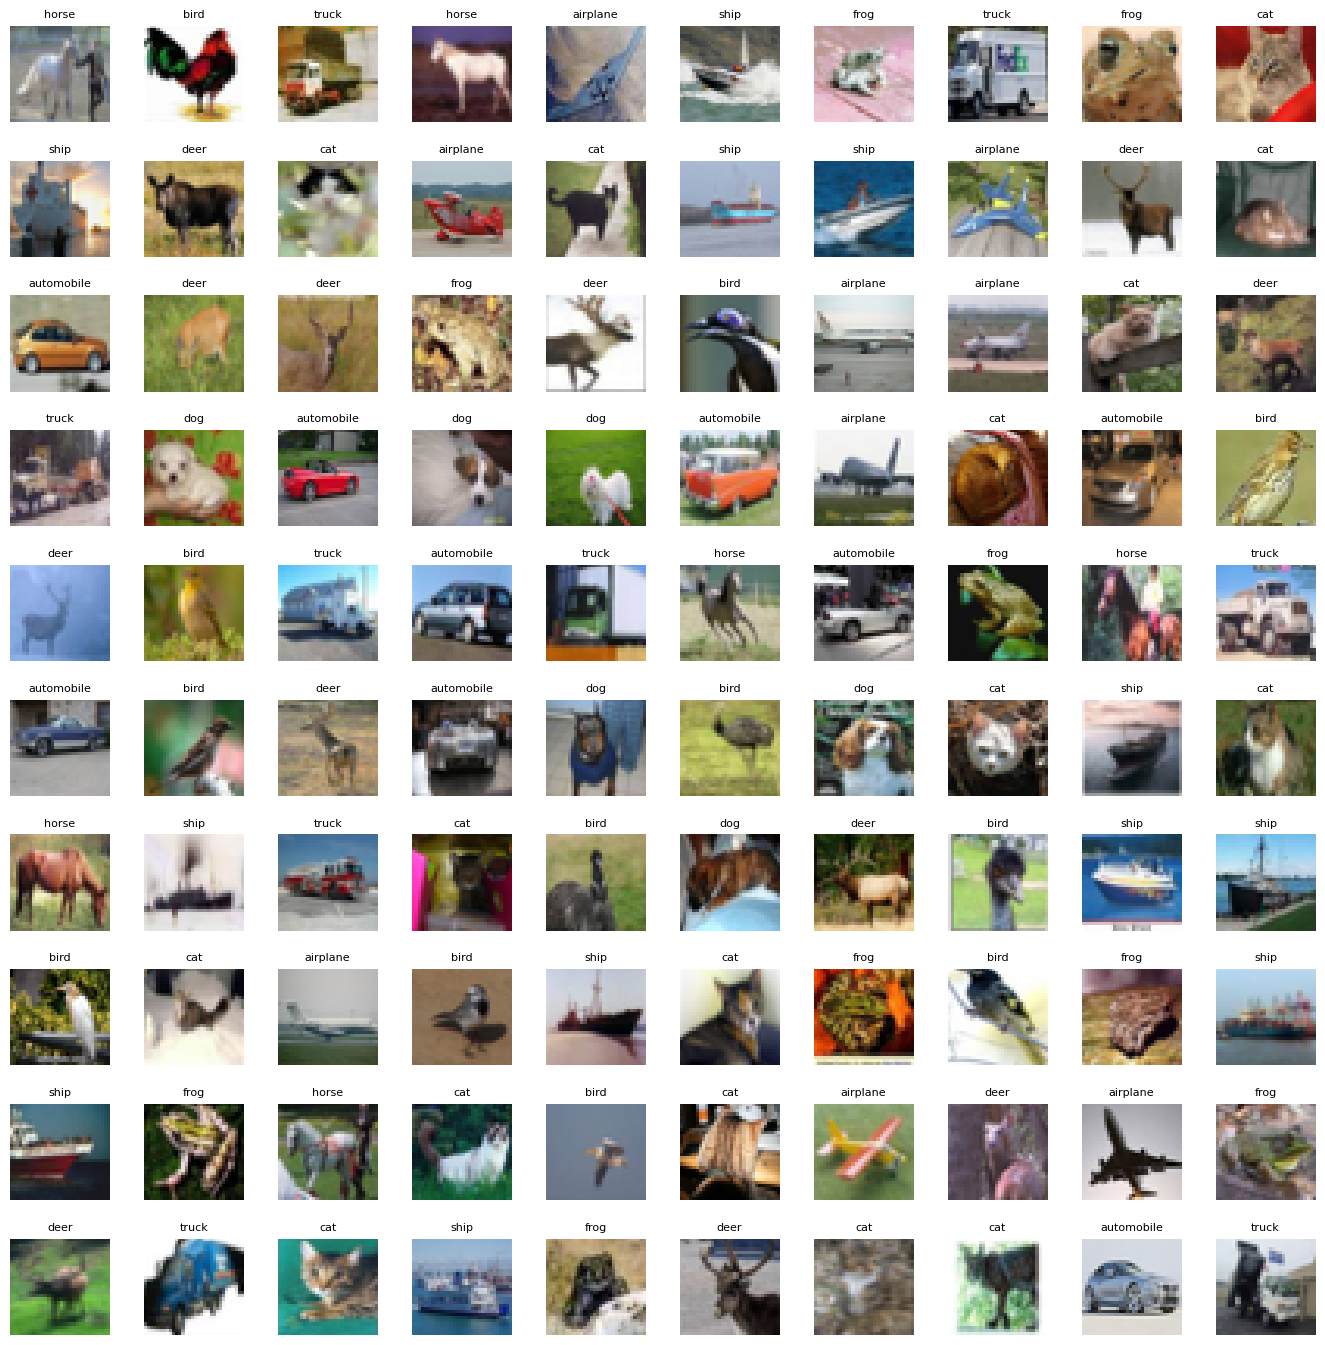

In [4]:
# Data Visualization #
 
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

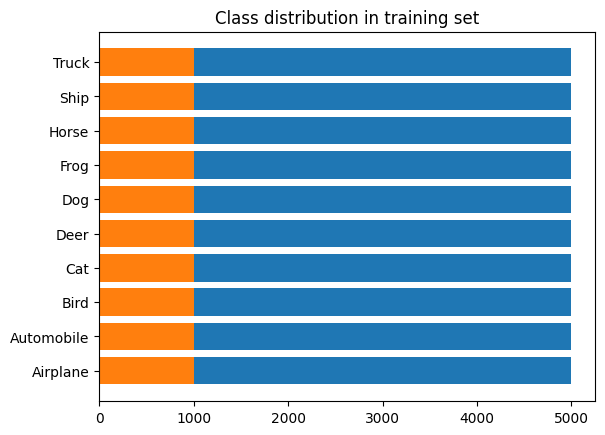

In [5]:
# Data Distribution visualization # 

classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')


classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

In [6]:
# Divisione con insieme di validazione formato dal % del train
percentuale = 0.1
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=percentuale, random_state=1)

In [7]:
# Normalizzazione in 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

In [8]:
############################################################################################

In [10]:
# Dimensioni Train
print("Dimensioni train : " , x_train.shape)
print ("Dimensioni etichette_train : " , y_train.shape)
# Dimensioni Validation
print("\nDimensioni validation : " , x_val.shape)
print ("Dimensioni etichette_val : " , y_val.shape)
# Dimensioni Test
print("\nDimensioni test : " , x_test.shape)
print ("Dimensioni etichette_test : " , y_test.shape)

Dimensioni train :  (45000, 32, 32, 3)
Dimensioni etichette_train :  (45000, 1)

Dimensioni validation :  (5000, 32, 32, 3)
Dimensioni etichette_val :  (5000, 1)

Dimensioni test :  (10000, 32, 32, 3)
Dimensioni etichette_test :  (10000, 1)


In [9]:
############################################################################################

In [13]:
# Stampa dei possibili valori delle etichette e del numero di volte che si ripetono nel Train
print("Numero di valori per ogni etichetta in train: ")
print(np.unique(y_train, return_counts = True))
# Stampa dei possibili valori delle etichette e del numero di volte che si ripetono nel Validation
print("\nNumero di valori per ogni etichetta in train: ")
print(np.unique(y_val, return_counts = True))
# Stampa dei possibili valori delle etichette e del numero di volte che si ripetono nel test
print("\nNumero di valori per ogni etichetta in test : ")
print(np.unique(y_test, return_counts = True))

Numero di valori per ogni etichetta in train: 
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([4490, 4508, 4485, 4526, 4470, 4502, 4499, 4511, 4519, 4490],
      dtype=int64))

Numero di valori per ogni etichetta in train: 
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([510, 492, 515, 474, 530, 498, 501, 489, 481, 510], dtype=int64))

Numero di valori per ogni etichetta in test : 
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [13]:
######################################################################################
###################### -- PANDAS DF -- ###############################################
######################################################################################

# Riduzione di dimensionalità x train
##  print(" - Creazione Df x train - ")

# -1 -> numero righe finali impostato in automatico
# 3072 -> numero colonne che deriva da 32*32*3
# - in questo modo ogni riga corrisponde a un'immagine e ogni colonna il valore di un pixel in un'unico canale colore
x_train_flat = x_train.reshape(-1,3072)

# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
# - utile in seguito in modo da assegnare nome a colonne del Data Frame Pandas
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

# Creazione del dataframe pandas
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

##  print("Shape di df_cifar : ")
##  print(df_cifar.shape)
##  print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar['label'] = y_train

##  print("Shape del df_cifar dopo aggiunta etichette : ")
##  print(df_cifar.shape)




In [14]:
################################################################################

# Riduzione di dimensionalità x val
##  print("Creazione Df x val")
x_val_flat = x_val.reshape(-1,3072)

# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
feat_cols_val = ['pixel'+str(i) for i in range(x_val_flat.shape[1])]

##  print("")

# Creazione del dataframe
df_cifar_val = pd.DataFrame(x_val_flat,columns=feat_cols_val)
##  print("Shape del df_cifar_val : ")
##  print(df_cifar_val.shape)

##  print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar_val['label'] = y_val
##  print("Shape del df_cifar_val con etichette : ")
##  print(df_cifar_val.shape)

In [15]:
# Riduzione di dimensionalità x test
##  print("Creazione Df x test")

x_test_flat = x_test.reshape(-1,3072)


# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
feat_cols_test = ['pixel'+str(i) for i in range(x_test_flat.shape[1])]

##  print("")

# Creazione del dataframe
df_cifar_test = pd.DataFrame(x_test_flat,columns=feat_cols_test)
##  print("Shape di df_cifar_test : ")
##  print(df_cifar_test.shape)

##  print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar_test['label'] = y_test
##  print("Shape del df_cifar_test con etichette : ")
##  print(df_cifar_test.shape)

In [16]:
################################################################################

# Utilizzo di PCA su TRAIN

# n_components è il numero di componenti che vogliamo valutare come obiettivo
pca_train = PCA(n_components=2)

# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar = pca_train.fit_transform(df_cifar.iloc[:,:-1])

################################################################################

# Utilizzo di PCA su TEST

pca_test = PCA(n_components=2)


# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar_test = pca_test.fit_transform(df_cifar_test.iloc[:,:-1])

################################################################################

# Utilizzo di PCA su VAL

pca_val = PCA(n_components=2)


# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar_val = pca_val.fit_transform(df_cifar_val.iloc[:,:-1])


In [17]:
################################################################################

##  print("Assegnazione nome colonne a DF ottenuto x TRAIN")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
pca_cifar_Df = pd.DataFrame(data = principalComponents_cifar, columns = ['principal component 1', 'principal component 2'])

##  print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
##  print("Creazione dataframe con etichette come ultima colonna")
pca_cifar_Df_con_etichette = pca_cifar_Df.copy()
pca_cifar_Df_con_etichette['y'] = y_train

##  print("")

# - STAMPE DI SERVIZIO - # 
# Stampa del nuovo DF
#print("Shape del DF risultato :")
#print(principal_cifar_Df.shape)

#print("")

# Stampa delle prime righe del DF
#print("Head di principal_cifar_Df : ")
#principal_cifar_Df.head()

#print("Shape del DF_etichettato risultato :")
#print(principal_cifar_Df_con_etichette.shape)

#print("")

# Stampa delle prime righe del DF
#print("Head di principal_cifar_Df_etichettato : ")
#principal_cifar_Df_con_etichette.head()

In [18]:
################################################################################

print("Assegnazione nome colonne a DF ottenuto x TEST")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
pca_cifar_Df_test = pd.DataFrame(data = principalComponents_cifar_test, columns = ['principal component 1', 'principal component 2'])

print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
print("Creazione dataframe con etichette come ultima colonna x test")
pca_cifar_Df_con_etichette_test = pca_cifar_Df_test.copy()
pca_cifar_Df_con_etichette_test['y'] = y_test

# - STAMPE DI SERVIZIO - # 
# Stampa del nuovo DF_test
#print("Shape del DF risultato :")
#print(principal_cifar_Df_test.shape)

#print("")

# Stampa delle prime righe del DF
#print("Head di principal_cifar_Df : ")
#principal_cifar_Df_test.head()

# Stampa del nuovo DF
#print("Shape del Df ottenuto x test :")
#print(principal_cifar_Df_con_etichette_test.shape)

#print("")

# Stampa delle prime righe del DF
#principal_cifar_Df_con_etichette_test.head()

Assegnazione nome colonne a DF ottenuto x TEST

Creazione dataframe con etichette come ultima colonna x test


In [19]:
################################################################################

print("Assegnazione nome colonne a DF ottenuto x val")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
pca_cifar_Df_val = pd.DataFrame(data = principalComponents_cifar_val, columns = ['principal component 1', 'principal component 2'])

print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
print("Creazione dataframe con etichette come ultima colonna x val")
pca_cifar_Df_con_etichette_val = pca_cifar_Df_val.copy()
pca_cifar_Df_con_etichette_val['y'] = y_val

# - STAMPE DI SERVIZIO - #
# Stampa del nuovo DF_val
#print("Shape del DF risultato :")
#print(principal_cifar_Df_val.shape)

#print("")

# Stampa delle prime righe del DF
#print("Head di principal_cifar_Df : ")
#principal_cifar_Df_val.head()

# Stampa del nuovo DF
#print("Shape del Df ottenuto x val :")
#print(principal_cifar_Df_con_etichette_val.shape)

#print("")

# Stampa delle prime righe del DF
#principal_cifar_Df_con_etichette_val.head()

Assegnazione nome colonne a DF ottenuto x val

Creazione dataframe con etichette come ultima colonna x val


In [20]:
################################################################################
### STAMPA VARIANZA ############################################################
################################################################################

# Stampa della varianza memorizzata all'interno delle componenti selezionate da PCA
print('Varianza delle componenti selezionate DF train : {}'.format(pca_train.explained_variance_ratio_))

# Stampa della varianza memorizzata all'interno delle componenti selezionate da PCA_val
print('Varianza delle componenti selezionate in DF val : {}'.format(pca_val.explained_variance_ratio_))

# Stampa della varianza memorizzata all'interno delle componenti selezionate da PCA_test
print('Varianza delle componenti selezionate in DF test : {}'.format(pca_test.explained_variance_ratio_))

Varianza delle componenti selezionate DF train : [0.2908679  0.11252242]
Varianza delle componenti selezionate in DF val : [0.29003116 0.11280395]
Varianza delle componenti selezionate in DF test : [0.29161647 0.10896881]


Grafico distribuizione valori di TRAIN



C:\Users\domen\AppData\Local\Temp\ipykernel_4356\2317683120.py:7: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

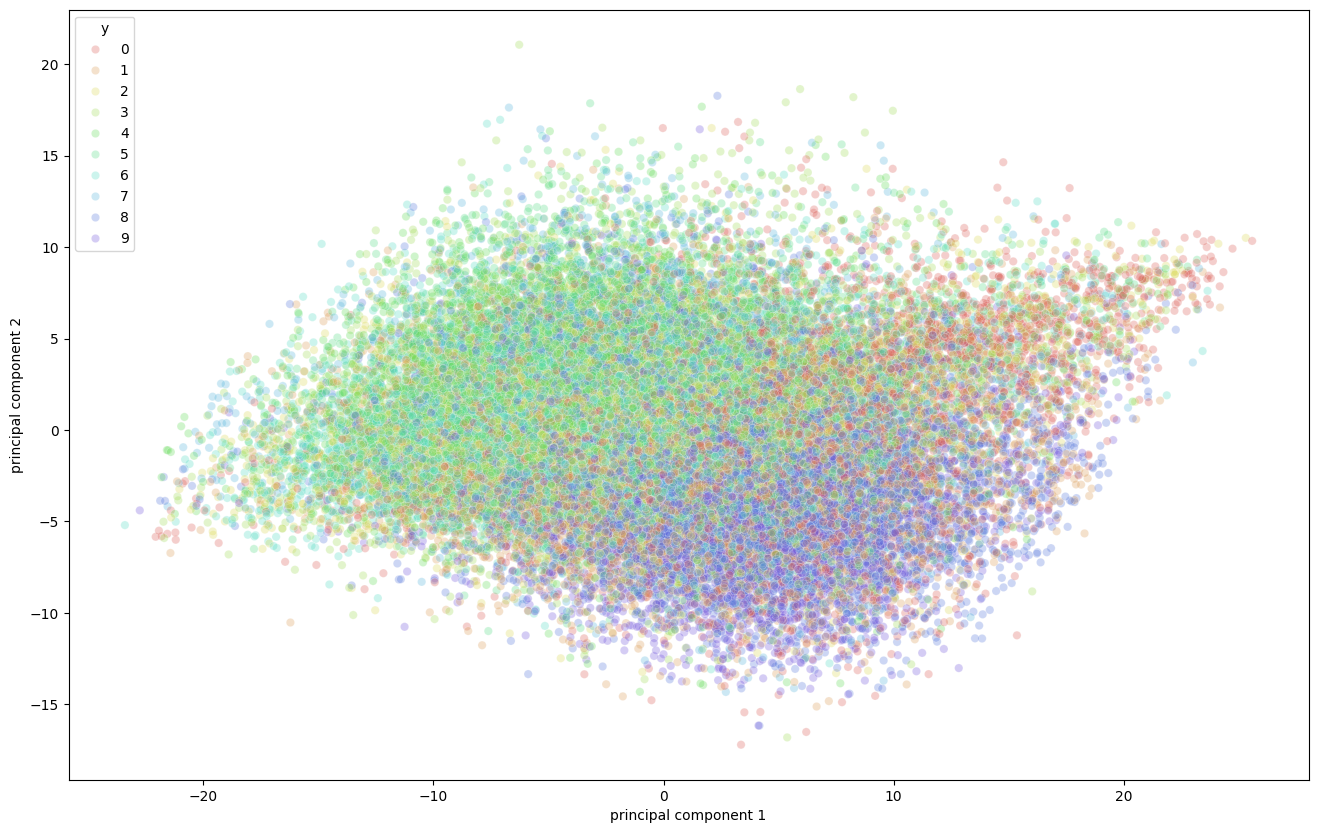

In [21]:
print("Grafico distribuizione valori di TRAIN")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 13),
    data=pca_cifar_Df_con_etichette,
    legend="full",
    alpha=0.3
)

Grafico distribuizione valori di TEST



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

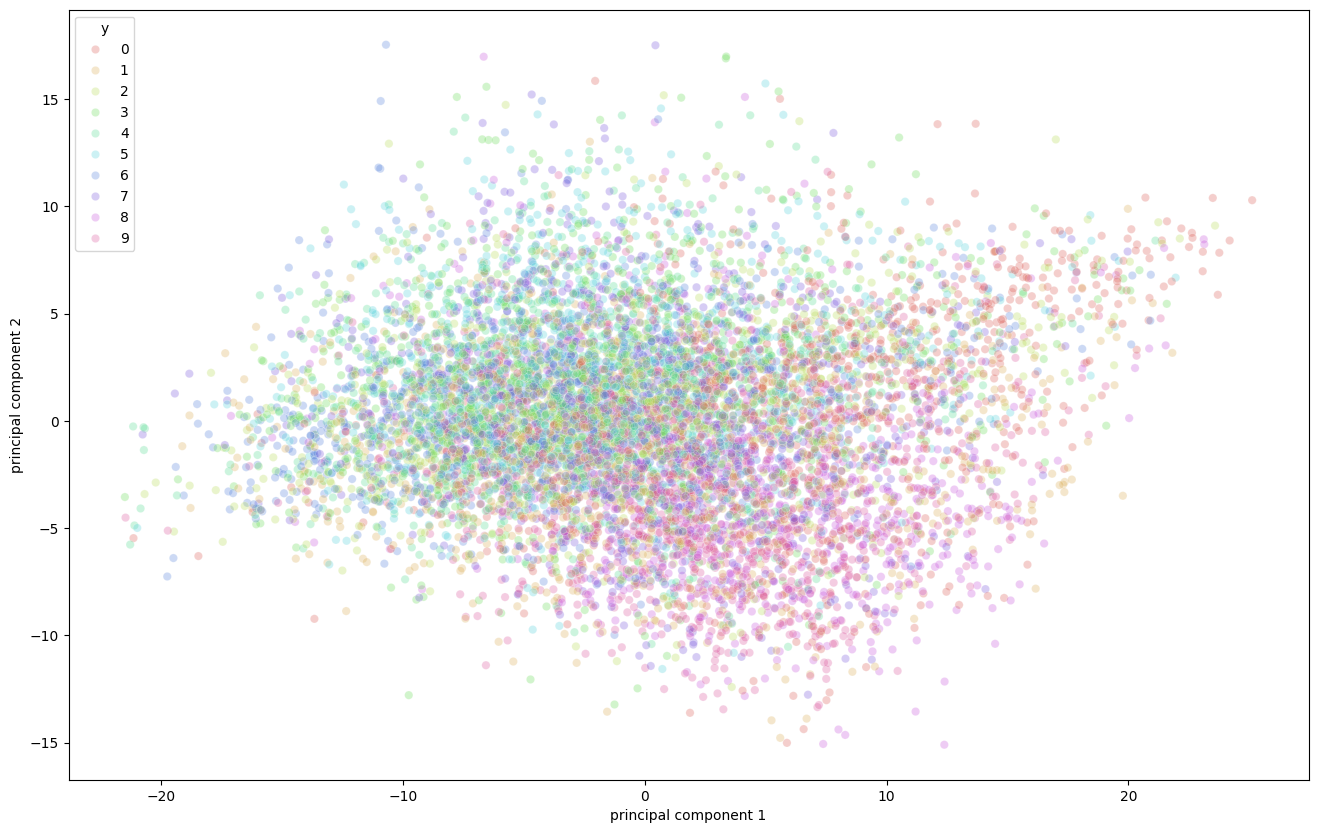

In [22]:
print("Grafico distribuizione valori di TEST")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=pca_cifar_Df_con_etichette_test,
    legend="full",
    alpha=0.3
)

Grafico distribuizione valori di val



C:\Users\domen\AppData\Local\Temp\ipykernel_4356\2721250616.py:7: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

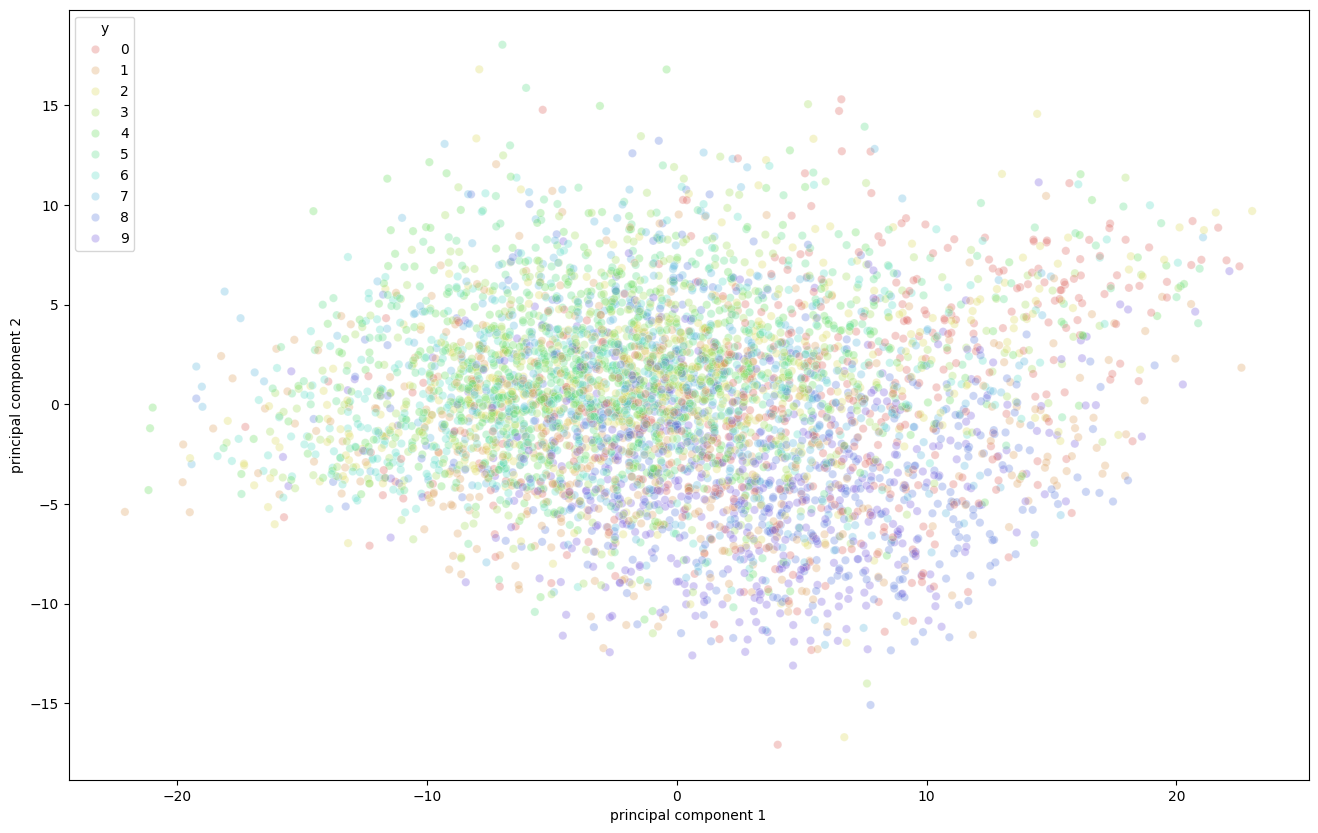

In [23]:
print("Grafico distribuizione valori di val")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 13),
    data=pca_cifar_Df_con_etichette_val,
    legend="full",
    alpha=0.3
)

In [24]:
# Ora ho capito comme ridurre la dimensionalità del dataset posso fare operazioni di classificazione con SVM ?

In [25]:
##################################################################################################################
### - PRIMA DI CONTINUARE DEVO SUDDIVIDERE IL DATASET IN MODO DA POTER CONFRONTARE SOLO DUE CLASSI PER VOLTA - ###
##################################################################################################################

In [26]:
# - Preparazione dei dataset filtrati

# Prova di divisione in due classi
primaEtichetta = 4
secondaEtichetta = 9

df_filtrato_etichettato = pca_cifar_Df_con_etichette[pca_cifar_Df_con_etichette['y'].isin([primaEtichetta,secondaEtichetta])]
df_filtrato_etichettato_test = pca_cifar_Df_con_etichette_test[pca_cifar_Df_con_etichette_test['y'].isin([primaEtichetta,secondaEtichetta])]
df_filtrato_etichettato_val = pca_cifar_Df_con_etichette_val[pca_cifar_Df_con_etichette_val['y'].isin([primaEtichetta,secondaEtichetta])]

In [27]:
print("Numero di elementi in ottenuti in df_filtrato_etichettato : ", df_filtrato_etichettato.shape)
print("Numero di elementi in ottenuti in df_filtrato_etichettato_val : ", df_filtrato_etichettato_val.shape)
print("Numero di elementi in ottenuti in df_filtrato_etichettato_test : ", df_filtrato_etichettato_test.shape)


Numero di elementi in ottenuti in df_filtrato_etichettato :  (8960, 3)
Numero di elementi in ottenuti in df_filtrato_etichettato_val :  (1040, 3)
Numero di elementi in ottenuti in df_filtrato_etichettato_test :  (2000, 3)


In [28]:
# Filtro i dati delle etichette
y_train_filtrato = y_train[np.isin(y_train, [primaEtichetta,secondaEtichetta])]
y_test_filtrato = y_test[np.isin(y_test, [primaEtichetta,secondaEtichetta])]
y_val_filtrato = y_val[np.isin(y_val, [primaEtichetta,secondaEtichetta])]

In [29]:
print("Numero di elementi in ottenuti in y_train_filtrato : " , y_train_filtrato.shape)
print("Numero di elementi in ottenuti in y_val_filtrato : " , y_val_filtrato.shape)
print("Numero di elementi in ottenuti in y_test_filtrato : " , y_test_filtrato.shape)

Numero di elementi in ottenuti in y_train_filtrato :  (8960,)
Numero di elementi in ottenuti in y_val_filtrato :  (1040,)
Numero di elementi in ottenuti in y_test_filtrato :  (2000,)


In [30]:
# Eliminazione colonna etichette
df_filtrato = df_filtrato_etichettato.copy()
df_filtrato = df_filtrato.drop(columns=['y'])

# Eliminazione colonna etichette
df_filtrato_test = df_filtrato_etichettato_test.copy()
df_filtrato_test = df_filtrato_test.drop(columns=['y'])

# Eliminazione colonna etichette
df_filtrato_val = df_filtrato_etichettato_val.copy()
df_filtrato_val = df_filtrato_val.drop(columns=['y'])

In [31]:
print("Numero di elementi in ottenuti in df_filtrato : ",df_filtrato.shape)
print("Numero di elementi in ottenuti in df_filtrato_test : ",df_filtrato_test.shape)
print("Numero di elementi in ottenuti in df_filtrato_val : ",df_filtrato_val.shape)

Numero di elementi in ottenuti in df_filtrato :  (8960, 2)
Numero di elementi in ottenuti in df_filtrato_test :  (2000, 2)
Numero di elementi in ottenuti in df_filtrato_val :  (1040, 2)


Grafico distribuizione valori di TRAIN_filtrato



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

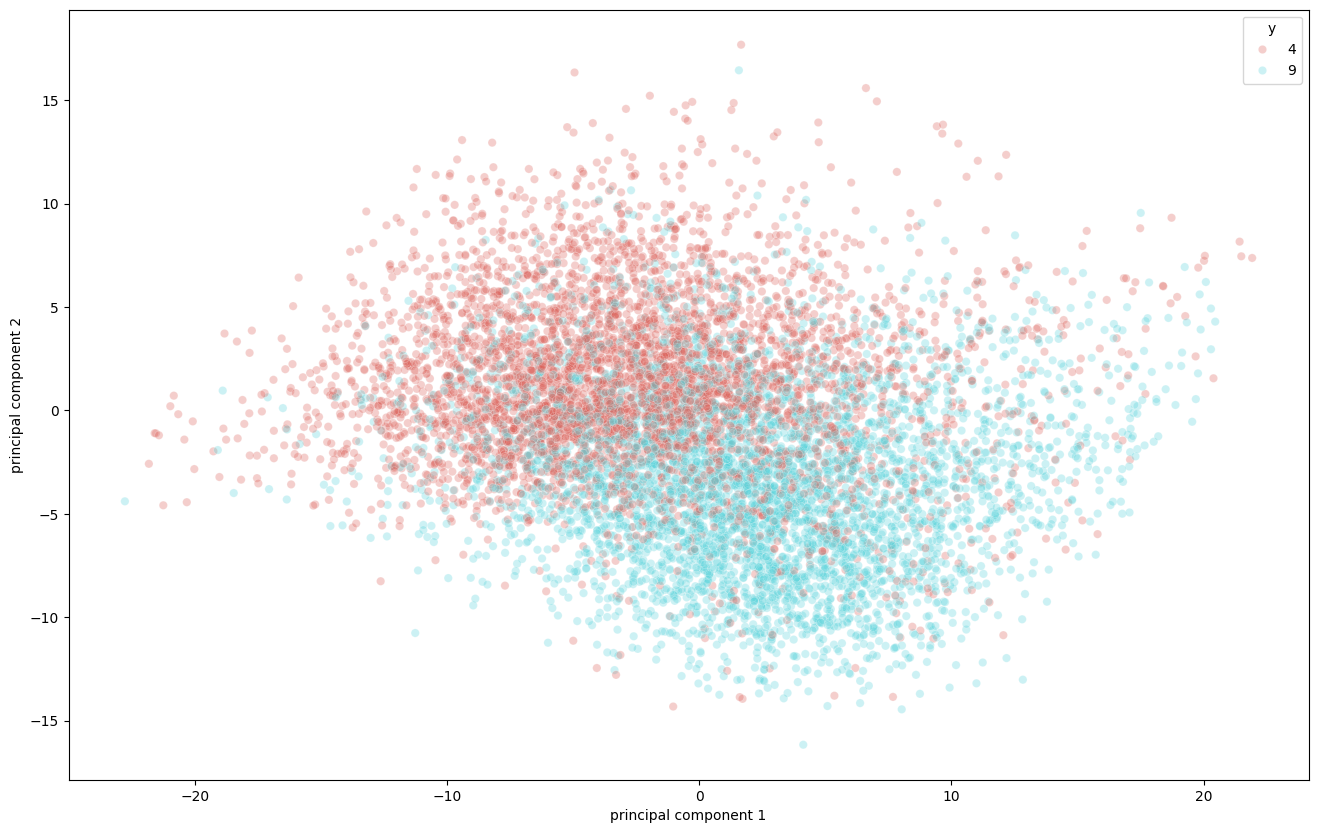

In [32]:
# Visualizzao schemi dei due DF ottenuti
print("Grafico distribuizione valori di TRAIN_filtrato")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_filtrato_etichettato,
    legend="full",
    alpha=0.3
)

Grafico distribuizione valori di test_filtrato



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

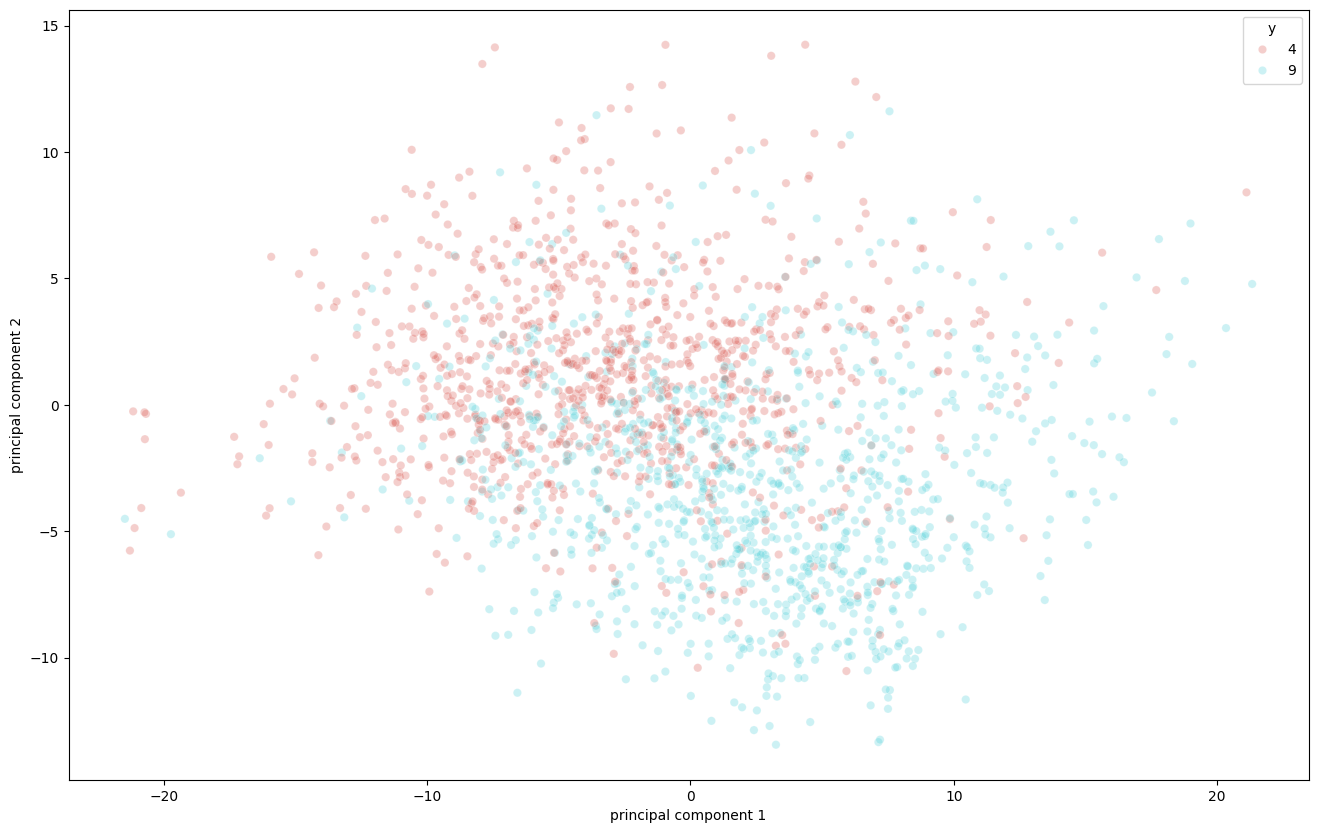

In [33]:
print("Grafico distribuizione valori di test_filtrato")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_filtrato_etichettato_test,
    legend="full",
    alpha=0.3
)

Grafico distribuizione valori di val_filtrato



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

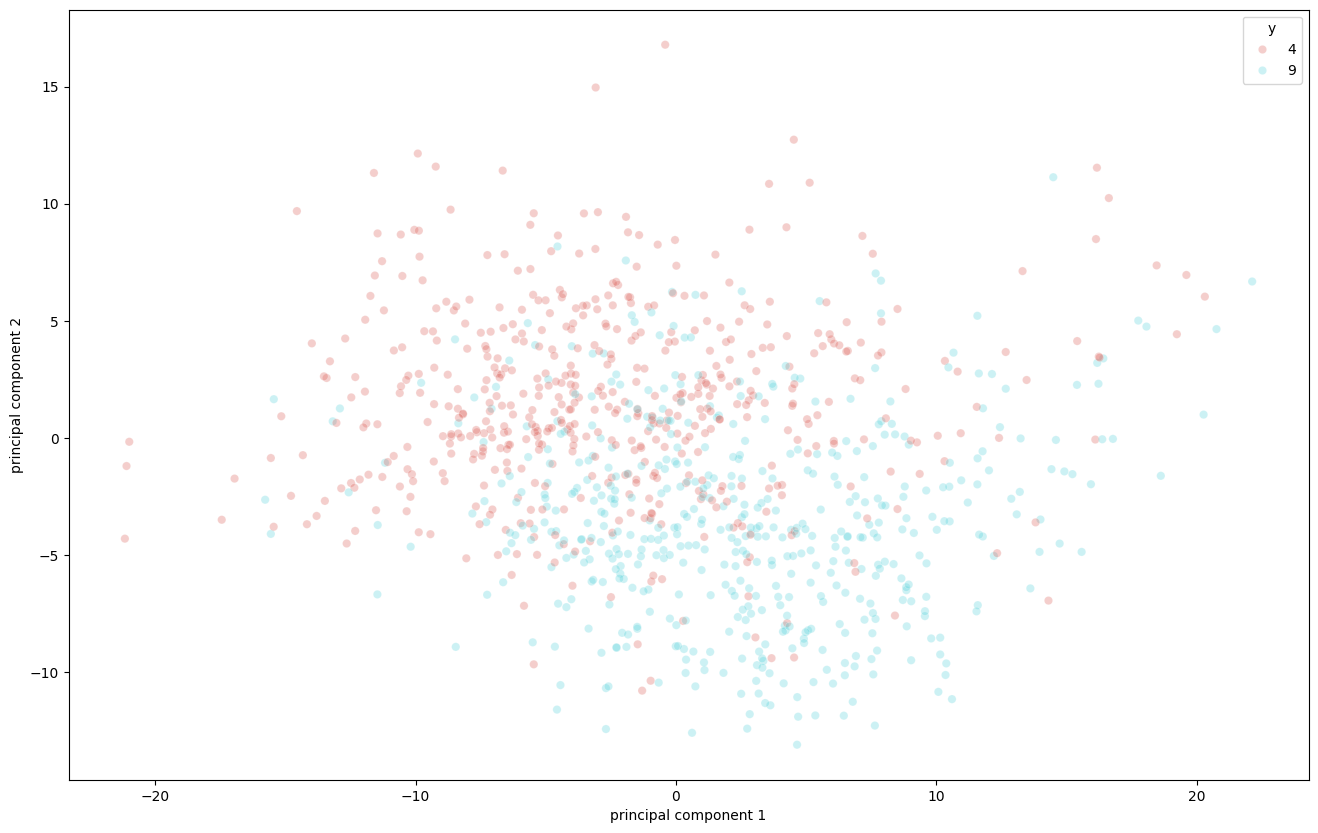

In [34]:
print("Grafico distribuizione valori di val_filtrato")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_filtrato_etichettato_val,
    legend="full",
    alpha=0.3
)


 Numero caratteristiche individuate :  2

 - TRAIN - 
Epoch 1/5


c:\Users\domen\Desktop\prova\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6155 - loss: 1.8126 - val_accuracy: 0.7660 - val_loss: 0.9940
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7615 - loss: 0.8847 - val_accuracy: 0.7665 - val_loss: 0.6691
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7626 - loss: 0.6417 - val_accuracy: 0.7670 - val_loss: 0.5781
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7622 - loss: 0.5719 - val_accuracy: 0.7680 - val_loss: 0.5503
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7658 - loss: 0.5454 - val_accuracy: 0.7630 - val_loss: 0.5396

 - VALUTAZIONE - 
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7597 - loss: 0.5385
Accuratezza: 0.7630000114440918

 - Grafico - 

 - Valutazione - 
63/63 - 0s - 1ms/step - accuracy: 0.7630 - loss: 0.5396


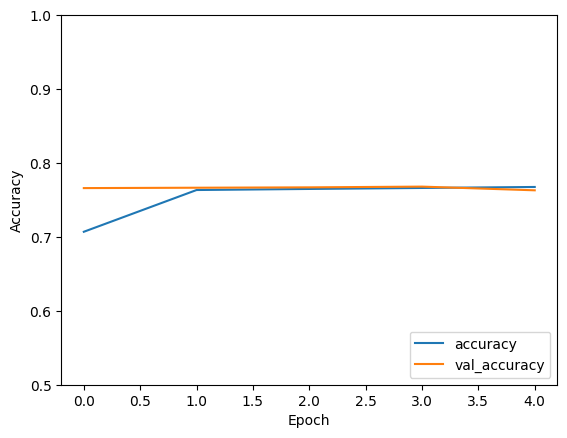

In [35]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


##############################################
## - APPROCCIO CON MODELLO TROVATO ONLINE - ##
###################################################################################
# -> https://www.datacamp.com/tutorial/principal-component-analysis-in-python <- ##
###################################################################################
# - Utilizzo di una NN sequenziale - #########
###############################################################################
# - Senza scremare il dataset il risultato della classificazione è inutile - ##
###############################################################################

# Imposto PCA in modo che mantenga il 90% della varianza originale
pca = PCA(n_components=2)

# Adattamento dei dati in modo che mantengano le caratteristiche desiderate
pca.fit(df_filtrato)

# Creazione dell'oggetto PCA con i parametri desiderati
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

# Stampa dei componenti individuati in fase di riduzione della dimensionalità
print("\n Numero caratteristiche individuate : ",pca.n_components_)

# Applico trasformazione a dati in modo da proiettarli su uno spazio di dimensionalità ridotta
# - Ottenuto prima
train_img_pca = pca.transform(df_filtrato)
test_img_pca = pca.transform(df_filtrato_test)

# Numero di classi da classificare
num_classes = 10

# Vettore delle etichette creato come vettore one-shot
y_train = to_categorical(y_train_filtrato,num_classes)
y_test = to_categorical(y_test_filtrato,num_classes)

# Numero di elementi da utilizzare per aggiornamento pesi
batch_size = 512 #512 #128

# Epoche su cui basare l'apprendimento
epochs = 5 #20 #100

# Definizione degli strati della rete
model = Sequential()
##  model.add(Dense(2042, activation='relu', input_shape=(2,)))
model.add(Dense(1024, activation='relu', input_shape=(2,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
##  model.add(Dense(64, activation='relu'))
##  model.add(Dense(32, activation='relu'))
##  model.add(Dense(16, activation='relu'))
##  model.add(Dense(8, activation='relu'))
##  model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

'''
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(2,)))
model.add(Dropout(0.2))  # Introduce dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.01),
                metrics=['accuracy'])
'''
                
# Stampa della conformazione del modello
##  model.summary()

# Assemblaggio del modello
## model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Esecuzione allenamento e calcolo affidabilità
print("\n - TRAIN - ")
history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(test_img_pca, y_test))

print("\n - VALUTAZIONE - ")
score = model.evaluate(test_img_pca, y_test)
print("Accuratezza:", score[1])

'''
print("\n - TEST - ")
predizione = model.predict(test_img_pca)
for i in range(len(predizione[:,])):
    print("Predizione ", i , " : " , np.argmax(predizione[i]))
    print("Etichetta reale : " , y_test_filtrato[i])
    print(" -- ")
'''

print("\n - Grafico - ")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

print("\n - Valutazione - ")
test_loss, test_acc = model.evaluate(test_img_pca,  y_test, verbose=2)

In [36]:
###########################
## Capire come procedere ##
###########################
# - classificare altro con NN ? - #
# - modificare parametri ?  - #
# - procedere con altri metodi di classificazione - #
# - 1 vs tutti ? o no ?  - #

In [37]:
###################################################################################
### ORA alleno il modello nel distinguere con SVM solo i valori di classe 0 e 1 ###
###################################################################################

# - Inizio del lavoro con Support Vector Machine

# Import del modello di Support Vector Classifiers
from sklearn.svm import SVC

# Utilizzo di tuning automatico degli iperparametri tramite GridSearch
from sklearn.model_selection import GridSearchCV

In [38]:
# METODO 1 - DIVISORE LINEARE

#############################################################################################
# - Ho inserito i dati di validazione per il training per testare con dataset più piccolo - #
#############################################################################################

# parameters for linear SVM
# - C è il parametro che regola fitting del modello, minore è meglio e meno adattato ai dati di training utilizzati
##parameters = {'C': [0.01,0.1,1,10,100,1000]}
parameters = {'C': [0.01]}
linear_SVM = SVC(kernel='linear')

grid_linear=GridSearchCV(linear_SVM, parameters, cv=5)

# - Comando utile a trasformare le etichette nel formato desiderato
y_x_svm = y_train_filtrato.ravel()

# FITTING LINEAR KERNEL

grid_linear.fit(df_filtrato, y_x_svm)

print("Best score : " , grid_linear.best_score_)
print("Best parameters : " , grid_linear.best_params_)

Best score :  0.7678571428571429
Best parameters :  {'C': 0.01}


In [39]:
'''

# METODO 2 - KERNEL POLINOMIALE

# parameters for poly with degree 2 kernel
#parameters = {'C': [100,10,1],'gamma':[0.01,0.1,1.], 'degree':[2,3]}
parameters = {'C': [100],'gamma':[0.01,0.1,1.], 'degree':[2,3]}
poly2_SVM = SVC(kernel='poly')

grid_poly=GridSearchCV(poly2_SVM, parameters, cv=5)
grid_poly.fit(df_filtrato_val, y_val_filtrato)

print ('\nRESULTS FOR POLY DEGREE KERNEL\n')

print("Best parameters set found:")
print(grid_poly.best_params_)

print("\nScore with best parameters:")
print(grid_poly.best_score_)

'''

'\n\n# METODO 2 - KERNEL POLINOMIALE\n\n# parameters for poly with degree 2 kernel\n#parameters = {\'C\': [100,10,1],\'gamma\':[0.01,0.1,1.], \'degree\':[2,3]}\nparameters = {\'C\': [100],\'gamma\':[0.01,0.1,1.], \'degree\':[2,3]}\npoly2_SVM = SVC(kernel=\'poly\')\n\ngrid_poly=GridSearchCV(poly2_SVM, parameters, cv=5)\ngrid_poly.fit(df_filtrato_val, y_val_filtrato)\n\nprint (\'\nRESULTS FOR POLY DEGREE KERNEL\n\')\n\nprint("Best parameters set found:")\nprint(grid_poly.best_params_)\n\nprint("\nScore with best parameters:")\nprint(grid_poly.best_score_)\n\n'

In [40]:
# METODO 3 

# parameters for rbf SVM

##  parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
parameters = {'C': [1],'gamma':[0.1]}

rbf_SVM = SVC(kernel='rbf')

grid_rbf=GridSearchCV(rbf_SVM, parameters, cv=5)
grid_rbf.fit(df_filtrato, y_x_svm)
print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(grid_rbf.best_params_)

print("\nScore with best parameters:")
print(grid_rbf.best_score_)


RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}

Score with best parameters:
0.7671875


In [42]:
# CLASSIFICAZIONE con Random Forest su set filtrato

# Train
# - ExtraTreesClassifier è una versione alternativa di RF dove viene introdotto un fattore di casualità che potrebbe migliorare i risultati che si ottengono
from sklearn.ensemble import ExtraTreesClassifier

# clf -> classifier
# - n_estimators -> numero di alberi decisionali utilizzati
# - - ho fatto varie prove partendo da 100, un numero minore di 10 porta a problemi nelle predizioni
# - random_state -> seme per il valore casuale che verrà utilizzato, utile a aumentare la riproducibilità dell'algoritmo
clf = ExtraTreesClassifier(n_estimators=100, random_state=1)

clf.fit(df_filtrato, y_train_filtrato)

##  print("\n Shape di df_filtrato : " , df_filtrato.shape)
##  print("\n Shape di y_train_filtrato : " , y_train_filtrato.shape)

# Test di RF
training_error_RF = 1. - clf.score(df_filtrato, y_train_filtrato)
test_error = 1. - clf.score(df_filtrato_test, y_test_filtrato)


print ("\nRF training error : %f" % training_error_RF)
print ("RF test error : %f" % test_error)
print("Best score RF : " , 1-test_error)



RF training error : 0.000000
RF test error : 0.272500
Best score RF :  0.7275
